In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

In [2]:
Foxconn=pd.read_csv('2317.csv',sep='\t')
Foxconn.index=pd.to_datetime(Foxconn.Date,
              format='%Y-%m-%d')
Foxconn.head(2)

,Date,Close,Open,High,Low,Volume
Date,,,,,,
2015-06-01,2015-06-01,77.0,78.43,78.43,77.00,36037
2015-06-02,2015-06-02,77.4,76.76,77.79,76.53,35901


In [3]:
Close=Foxconn.Close
Close.describe()

count    393.000000
mean      73.863435
std        5.248808
min       62.970000
25%       70.120000
50%       73.470000
75%       77.000000
max       85.700000
Name: Close, dtype: float64

# (a、b) 6日動量值

In [4]:
lag6Close=Close.shift(6)

In [5]:
momentum6=Close-lag6Close
momentum6.tail()

Date
2016-12-26   -0.3
2016-12-27    0.7
2016-12-28    0.3
2016-12-29    0.3
2016-12-30    1.4
Name: Close, dtype: float64

In [6]:
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

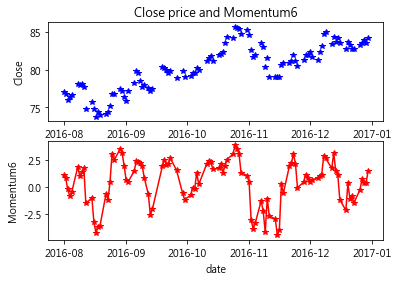

In [7]:
#plot
plt.subplot(211)
plt.plot(Close['2016-08-01':'2016-12-31'],'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Close price and Momentum6')
plt.subplot(212)
plt.plot(momentum6['2016-08-01':'2016-12-31'],'r-*')
plt.xlabel('date')
plt.ylabel('Momentum6')
plt.show()

In [8]:
#divide
Momen6=Close/lag6Close-1
Momen6=Momen6.dropna();
Momen6[:6]

Date
2015-06-09   -0.042078
2015-06-10   -0.022481
2015-06-11   -0.012376
2015-06-12    0.005349
2015-06-15   -0.003216
2015-06-16   -0.001065
Name: Close, dtype: float64

In [9]:
#divide
Momen6=Close/lag6Close-1
Momen6=Momen6.dropna();
Momen6[:6]
#momentum function
def momentum(price,periond):
    lagPrice=price.shift(periond)
    momen=price-lagPrice
    momen= momen.dropna()
    return(momen)

In [10]:
momentum(Close,5).tail(n=5)

Date
2016-12-26    0.5
2016-12-27   -0.2
2016-12-28    0.7
2016-12-29    0.8
2016-12-30    1.5
Name: Close, dtype: float64

In [11]:
momen6=momentum(Close,6)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator, \
                                DayLocator, MONDAY, date2num
import mpl_finance 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [13]:
"""
A collection of functions for analyzing and plotting
financial data.   User contributions welcome!

"""
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import numpy as np
from matplotlib import colors as mcolors
from matplotlib.collections import LineCollection, PolyCollection
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D

from six.moves import xrange, zip


def plot_day_summary_oclh(ax, quotes, ticksize=3,
                          colorup='k', colordown='r'):
    """Plots day summary

        Represent the time, open, close, high, low as a vertical line
        ranging from low to high.  The left tick is the open and the right
        tick is the close.



    Parameters
    ----------
    ax : `Axes`
        an `Axes` instance to plot to
    quotes : sequence of (time, open, close, high, low, ...) sequences
        data to plot.  time must be in float date format - see date2num
    ticksize : int
        open/close tick marker in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open

    Returns
    -------
    lines : list
        list of tuples of the lines added (one tuple per quote)
    """
    return _plot_day_summary(ax, quotes, ticksize=ticksize,
                             colorup=colorup, colordown=colordown,
                             ochl=True)


def plot_day_summary_ohlc(ax, quotes, ticksize=3,
                          colorup='k', colordown='r'):
    """Plots day summary

        Represent the time, open, high, low, close as a vertical line
        ranging from low to high.  The left tick is the open and the right
        tick is the close.



    Parameters
    ----------
    ax : `Axes`
        an `Axes` instance to plot to
    quotes : sequence of (time, open, high, low, close, ...) sequences
        data to plot.  time must be in float date format - see date2num
    ticksize : int
        open/close tick marker in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open

    Returns
    -------
    lines : list
        list of tuples of the lines added (one tuple per quote)
    """
    return _plot_day_summary(ax, quotes, ticksize=ticksize,
                             colorup=colorup, colordown=colordown,
                             ochl=False)


def _plot_day_summary(ax, quotes, ticksize=3,
                      colorup='k', colordown='r',
                      ochl=True):
    """Plots day summary


        Represent the time, open, high, low, close as a vertical line
        ranging from low to high.  The left tick is the open and the right
        tick is the close.



    Parameters
    ----------
    ax : `Axes`
        an `Axes` instance to plot to
    quotes : sequence of quote sequences
        data to plot.  time must be in float date format - see date2num
        (time, open, high, low, close, ...) vs
        (time, open, close, high, low, ...)
        set by `ochl`
    ticksize : int
        open/close tick marker in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    ochl: bool
        argument to select between ochl and ohlc ordering of quotes

    Returns
    -------
    lines : list
        list of tuples of the lines added (one tuple per quote)
    """
    # unfortunately this has a different return type than plot_day_summary2_*
    lines = []
    for q in quotes:
        if ochl:
            t, open, close, high, low = q[:5]
        else:
            t, open, high, low, close = q[:5]

        if close >= open:
            color = colorup
        else:
            color = colordown

        vline = Line2D(xdata=(t, t), ydata=(low, high),
                       color=color,
                       antialiased=False,   # no need to antialias vert lines
                       )

        oline = Line2D(xdata=(t, t), ydata=(open, open),
                       color=color,
                       antialiased=False,
                       marker=TICKLEFT,
                       markersize=ticksize,
                       )

        cline = Line2D(xdata=(t, t), ydata=(close, close),
                       color=color,
                       antialiased=False,
                       markersize=ticksize,
                       marker=TICKRIGHT)

        lines.extend((vline, oline, cline))
        ax.add_line(vline)
        ax.add_line(oline)
        ax.add_line(cline)

    ax.autoscale_view()

    return lines


def candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r',
                     alpha=1.0):
    """
    Plot the time, open, close, high, low as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, close, high, low, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).

        time must be in float days format - see date2num

    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level

    Returns
    -------
    ret : tuple
        returns (lines, patches) where lines is a list of lines
        added and patches is a list of the rectangle patches added

    """
    return _candlestick(ax, quotes, width=width, colorup=colorup,
                        colordown=colordown,
                        alpha=alpha, ochl=True)


def candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r',
                     alpha=1.0):
    """
    Plot the time, open, high, low, close as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, high, low, close, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).

        time must be in float days format - see date2num

    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level

    Returns
    -------
    ret : tuple
        returns (lines, patches) where lines is a list of lines
        added and patches is a list of the rectangle patches added

    """
    return _candlestick(ax, quotes, width=width, colorup=colorup,
                        colordown=colordown,
                        alpha=alpha, ochl=False)


def _candlestick(ax, quotes, width=0.2, colorup='k', colordown='r',
                 alpha=1.0, ochl=True):
    """
    Plot the time, open, high, low, close as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of quote sequences
        data to plot.  time must be in float date format - see date2num
        (time, open, high, low, close, ...) vs
        (time, open, close, high, low, ...)
        set by `ochl`
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
    ochl: bool
        argument to select between ochl and ohlc ordering of quotes

    Returns
    -------
    ret : tuple
        returns (lines, patches) where lines is a list of lines
        added and patches is a list of the rectangle patches added

    """

    OFFSET = width / 2.0

    lines = []
    patches = []
    for q in quotes:
        if ochl:
            t, open, close, high, low = q[:5]
        else:
            t, open, high, low, close = q[:5]

        if close >= open:
            color = colorup
            lower = open
            height = close - open
        else:
            color = colordown
            lower = close
            height = open - close

        vline = Line2D(
            xdata=(t, t), ydata=(low, high),
            color=color,
            linewidth=0.5,
            antialiased=True,
        )

        rect = Rectangle(
            xy=(t - OFFSET, lower),
            width=width,
            height=height,
            facecolor=color,
            edgecolor=color,
        )
        rect.set_alpha(alpha)

        lines.append(vline)
        patches.append(rect)
        ax.add_line(vline)
        ax.add_patch(rect)
    ax.autoscale_view()

    return lines, patches


def _check_input(opens, closes, highs, lows, miss=-1):
    """Checks that *opens*, *highs*, *lows* and *closes* have the same length.
    NOTE: this code assumes if any value open, high, low, close is
    missing (*-1*) they all are missing

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    closes : sequence
        sequence of closing values
    miss : int
        identifier of the missing data

    Raises
    ------
    ValueError
        if the input sequences don't have the same length
    """

    def _missing(sequence, miss=-1):
        """Returns the index in *sequence* of the missing data, identified by
        *miss*

        Parameters
        ----------
        sequence :
            sequence to evaluate
        miss :
            identifier of the missing data

        Returns
        -------
        where_miss: numpy.ndarray
            indices of the missing data
        """
        return np.where(np.array(sequence) == miss)[0]

    same_length = len(opens) == len(highs) == len(lows) == len(closes)
    _missopens = _missing(opens)
    same_missing = ((_missopens == _missing(highs)).all() and
                    (_missopens == _missing(lows)).all() and
                    (_missopens == _missing(closes)).all())

    if not (same_length and same_missing):
        msg = ("*opens*, *highs*, *lows* and *closes* must have the same"
               " length. NOTE: this code assumes if any value open, high,"
               " low, close is missing (*-1*) they all must be missing.")
        raise ValueError(msg)


def plot_day_summary2_ochl(ax, opens, closes, highs, lows, ticksize=4,
                           colorup='k', colordown='r'):
    """Represent the time, open, close, high, low,  as a vertical line
    ranging from low to high.  The left tick is the open and the right
    tick is the close.

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    closes : sequence
        sequence of closing values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    ticksize : int
        size of open and close ticks in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
         the color of the lines where close <  open

    Returns
    -------
    ret : list
        a list of lines added to the axes
    """

    return plot_day_summary2_ohlc(ax, opens, highs, lows, closes, ticksize,
                                  colorup, colordown)


def plot_day_summary2_ohlc(ax, opens, highs, lows, closes, ticksize=4,
                           colorup='k', colordown='r'):
    """Represent the time, open, high, low, close as a vertical line
    ranging from low to high.  The left tick is the open and the right
    tick is the close.
    *opens*, *highs*, *lows* and *closes* must have the same length.
    NOTE: this code assumes if any value open, high, low, close is
    missing (*-1*) they all are missing

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    closes : sequence
        sequence of closing values
    ticksize : int
        size of open and close ticks in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
         the color of the lines where close <  open

    Returns
    -------
    ret : list
        a list of lines added to the axes
    """

    _check_input(opens, highs, lows, closes)

    rangeSegments = [((i, low), (i, high)) for i, low, high in
                     zip(xrange(len(lows)), lows, highs) if low != -1]

    # the ticks will be from ticksize to 0 in points at the origin and
    # we'll translate these to the i, close location
    openSegments = [((-ticksize, 0), (0, 0))]

    # the ticks will be from 0 to ticksize in points at the origin and
    # we'll translate these to the i, close location
    closeSegments = [((0, 0), (ticksize, 0))]

    offsetsOpen = [(i, open) for i, open in
                   zip(xrange(len(opens)), opens) if open != -1]

    offsetsClose = [(i, close) for i, close in
                    zip(xrange(len(closes)), closes) if close != -1]

    scale = ax.figure.dpi * (1.0 / 72.0)

    tickTransform = Affine2D().scale(scale, 0.0)

    colorup = mcolors.to_rgba(colorup)
    colordown = mcolors.to_rgba(colordown)
    colord = {True: colorup, False: colordown}
    colors = [colord[open < close] for open, close in
              zip(opens, closes) if open != -1 and close != -1]

    useAA = 0,   # use tuple here
    lw = 1,      # and here
    rangeCollection = LineCollection(rangeSegments,
                                     colors=colors,
                                     linewidths=lw,
                                     antialiaseds=useAA,
                                     )

    openCollection = LineCollection(openSegments,
                                    colors=colors,
                                    antialiaseds=useAA,
                                    linewidths=lw,
                                    offsets=offsetsOpen,
                                    transOffset=ax.transData,
                                    )
    openCollection.set_transform(tickTransform)

    closeCollection = LineCollection(closeSegments,
                                     colors=colors,
                                     antialiaseds=useAA,
                                     linewidths=lw,
                                     offsets=offsetsClose,
                                     transOffset=ax.transData,
                                     )
    closeCollection.set_transform(tickTransform)

    minpy, maxx = (0, len(rangeSegments))
    miny = min([low for low in lows if low != -1])
    maxy = max([high for high in highs if high != -1])
    corners = (minpy, miny), (maxx, maxy)
    ax.update_datalim(corners)
    ax.autoscale_view()

    # add these last
    ax.add_collection(rangeCollection)
    ax.add_collection(openCollection)
    ax.add_collection(closeCollection)
    return rangeCollection, openCollection, closeCollection


def candlestick2_ochl(ax, opens, closes, highs, lows, width=4,
                      colorup='k', colordown='r',
                      alpha=0.75):
    """Represent the open, close as a bar line and high low range as a
    vertical line.

    Preserves the original argument order.


    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    closes : sequence
        sequence of closing values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    width : int
        size of open and close ticks in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    alpha : float
        bar transparency

    Returns
    -------
    ret : tuple
        (lineCollection, barCollection)
    """

    return candlestick2_ohlc(ax, opens, highs, lows, closes, width=width,
                             colorup=colorup, colordown=colordown,
                             alpha=alpha)


def candlestick2_ohlc(ax, opens, highs, lows, closes, width=4,
                      colorup='k', colordown='r',
                      alpha=0.75):
    """Represent the open, close as a bar line and high low range as a
    vertical line.

    NOTE: this code assumes if any value open, low, high, close is
    missing they all are missing


    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        sequence of opening values
    highs : sequence
        sequence of high values
    lows : sequence
        sequence of low values
    closes : sequence
        sequence of closing values
    width : int
        size of open and close ticks in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    alpha : float
        bar transparency

    Returns
    -------
    ret : tuple
        (lineCollection, barCollection)
    """

    _check_input(opens, highs, lows, closes)

    delta = width / 2.
    barVerts = [((i - delta, open),
                 (i - delta, close),
                 (i + delta, close),
                 (i + delta, open))
                for i, open, close in zip(xrange(len(opens)), opens, closes)
                if open != -1 and close != -1]

    rangeSegments = [((i, low), (i, high))
                     for i, low, high in zip(xrange(len(lows)), lows, highs)
                     if low != -1]

    colorup = mcolors.to_rgba(colorup, alpha)
    colordown = mcolors.to_rgba(colordown, alpha)
    colord = {True: colorup, False: colordown}
    colors = [colord[open < close]
              for open, close in zip(opens, closes)
              if open != -1 and close != -1]

    useAA = 0,  # use tuple here
    lw = 0.5,   # and here
    rangeCollection = LineCollection(rangeSegments,
                                     colors=colors,
                                     linewidths=lw,
                                     antialiaseds=useAA,
                                     )

    barCollection = PolyCollection(barVerts,
                                   facecolors=colors,
                                   edgecolors=colors,
                                   antialiaseds=useAA,
                                   linewidths=lw,
                                   )

    minx, maxx = 0, len(rangeSegments)
    miny = min([low for low in lows if low != -1])
    maxy = max([high for high in highs if high != -1])

    corners = (minx, miny), (maxx, maxy)
    ax.update_datalim(corners)
    ax.autoscale_view()

    # add these last
    ax.add_collection(rangeCollection)
    ax.add_collection(barCollection)
    return rangeCollection, barCollection


def volume_overlay(ax, opens, closes, volumes,
                   colorup='k', colordown='r',
                   width=4, alpha=1.0):
    """Add a volume overlay to the current axes.  The opens and closes
    are used to determine the color of the bar.  -1 is missing.  If a
    value is missing on one it must be missing on all

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    opens : sequence
        a sequence of opens
    closes : sequence
        a sequence of closes
    volumes : sequence
        a sequence of volumes
    width : int
        the bar width in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    alpha : float
        bar transparency

    Returns
    -------
    ret : `barCollection`
        The `barrCollection` added to the axes

    """

    colorup = mcolors.to_rgba(colorup, alpha)
    colordown = mcolors.to_rgba(colordown, alpha)
    colord = {True: colorup, False: colordown}
    colors = [colord[open < close]
              for open, close in zip(opens, closes)
              if open != -1 and close != -1]

    delta = width / 2.
    bars = [((i - delta, 0), (i - delta, v), (i + delta, v), (i + delta, 0))
            for i, v in enumerate(volumes)
            if v != -1]

    barCollection = PolyCollection(bars,
                                   facecolors=colors,
                                   edgecolors=((0, 0, 0, 1), ),
                                   antialiaseds=(0,),
                                   linewidths=(0.5,),
                                   )

    ax.add_collection(barCollection)
    corners = (0, 0), (len(bars), max(volumes))
    ax.update_datalim(corners)
    ax.autoscale_view()

    # add these last
    return barCollection


def volume_overlay2(ax, closes, volumes,
                    colorup='k', colordown='r',
                    width=4, alpha=1.0):
    """
    Add a volume overlay to the current axes.  The closes are used to
    determine the color of the bar.  -1 is missing.  If a value is
    missing on one it must be missing on all

    nb: first point is not displayed - it is used only for choosing the
    right color


    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    closes : sequence
        a sequence of closes
    volumes : sequence
        a sequence of volumes
    width : int
        the bar width in points
    colorup : color
        the color of the lines where close >= open
    colordown : color
        the color of the lines where close <  open
    alpha : float
        bar transparency

    Returns
    -------
    ret : `barCollection`
        The `barrCollection` added to the axes

    """

    return volume_overlay(ax, closes[:-1], closes[1:], volumes[1:],
                          colorup, colordown, width, alpha)


def volume_overlay3(ax, quotes,
                    colorup='k', colordown='r',
                    width=4, alpha=1.0):
    """Add a volume overlay to the current axes.  quotes is a list of (d,
    open, high, low, close, volume) and close-open is used to
    determine the color of the bar

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, high, low, close, ...) sequences
        data to plot.  time must be in float date format - see date2num
    width : int
        the bar width in points
    colorup : color
        the color of the lines where close1 >= close0
    colordown : color
        the color of the lines where close1 <  close0
    alpha : float
         bar transparency

    Returns
    -------
    ret : `barCollection`
        The `barrCollection` added to the axes


    """

    colorup = mcolors.to_rgba(colorup, alpha)
    colordown = mcolors.to_rgba(colordown, alpha)
    colord = {True: colorup, False: colordown}

    dates, opens, highs, lows, closes, volumes = list(zip(*quotes))
    colors = [colord[close1 >= close0]
              for close0, close1 in zip(closes[:-1], closes[1:])
              if close0 != -1 and close1 != -1]
    colors.insert(0, colord[closes[0] >= opens[0]])

    right = width / 2.0
    left = -width / 2.0

    bars = [((left, 0), (left, volume), (right, volume), (right, 0))
            for d, open, high, low, close, volume in quotes]

    sx = ax.figure.dpi * (1.0 / 72.0)  # scale for points
    sy = ax.bbox.height / ax.viewLim.height

    barTransform = Affine2D().scale(sx, sy)

    dates = [d for d, open, high, low, close, volume in quotes]
    offsetsBars = [(d, 0) for d in dates]

    useAA = 0,  # use tuple here
    lw = 0.5,   # and here
    barCollection = PolyCollection(bars,
                                   facecolors=colors,
                                   edgecolors=((0, 0, 0, 1),),
                                   antialiaseds=useAA,
                                   linewidths=lw,
                                   offsets=offsetsBars,
                                   transOffset=ax.transData,
                                   )
    barCollection.set_transform(barTransform)

    minpy, maxx = (min(dates), max(dates))
    miny = 0
    maxy = max([volume for d, open, high, low, close, volume in quotes])
    corners = (minpy, miny), (maxx, maxy)
    ax.update_datalim(corners)
    # print 'datalim', ax.dataLim.bounds
    # print 'viewlim', ax.viewLim.bounds

    ax.add_collection(barCollection)
    ax.autoscale_view()

    return barCollection


def index_bar(ax, vals,
              facecolor='b', edgecolor='l',
              width=4, alpha=1.0, ):
    """Add a bar collection graph with height vals (-1 is missing).

    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    vals : sequence
        a sequence of values
    facecolor : color
        the color of the bar face
    edgecolor : color
        the color of the bar edges
    width : int
        the bar width in points
    alpha : float
       bar transparency

    Returns
    -------
    ret : `barCollection`
        The `barrCollection` added to the axes

    """

    facecolors = (mcolors.to_rgba(facecolor, alpha),)
    edgecolors = (mcolors.to_rgba(edgecolor, alpha),)

    right = width / 2.0
    left = -width / 2.0

    bars = [((left, 0), (left, v), (right, v), (right, 0))
            for v in vals if v != -1]

    sx = ax.figure.dpi * (1.0 / 72.0)  # scale for points
    sy = ax.bbox.height / ax.viewLim.height

    barTransform = Affine2D().scale(sx, sy)

    offsetsBars = [(i, 0) for i, v in enumerate(vals) if v != -1]

    barCollection = PolyCollection(bars,
                                   facecolors=facecolors,
                                   edgecolors=edgecolors,
                                   antialiaseds=(0,),
                                   linewidths=(0.5,),
                                   offsets=offsetsBars,
                                   transOffset=ax.transData,
                                   )
    barCollection.set_transform(barTransform)

    minpy, maxx = (0, len(offsetsBars))
    miny = 0
    maxy = max([v for v in vals if v != -1])
    corners = (minpy, miny), (maxx, maxy)
    ax.update_datalim(corners)
    ax.autoscale_view()

    # add these last
    ax.add_collection(barCollection)
    return barCollection

In [14]:
def candleLinePlots(candleData, candleTitle='a', **kwargs):
    Date = [date2num(date) for date in candleData.index]
    candleData.loc[:,'Date'] = Date
    listData = []    
    for i in range(len(candleData)):
        a = [candleData.Date[i],\
            candleData.Open[i],candleData.High[i],\
            candleData.Low[i],candleData.Close[i]]
        listData.append(a)
    # 如 果 不 定 長 參 數 無 取 值 ， 只 畫 蠟 燭 圖
    ax = plt.subplot()
    
    # 如 果 不 定 長 參 數 有 值 ， 則 分 成 兩 個 子 圖
    flag=0
    if kwargs:
        if kwargs['splitFigures']:
            ax = plt.subplot(211)
            ax2= plt.subplot(212)
            flag=1;
        # 如 果 無 參 數 splitFigures ， 則 只 畫 一 個 圖 形 框
        # 如 果 有 參 數 splitFigures ， 則 畫 出 兩 個 圖 形 框        
        for key in kwargs:
            if key=='title':
                ax2.set_title(kwargs[key])
            if key=='ylabel':
                ax2.set_ylabel(kwargs[key])
            if key=='grid':
                ax2.grid(kwargs[key])
            if key=='Data':
                plt.sca(ax)
                if flag:
                    plt.sca(ax2)
                    
                #一維數據
                if kwargs[key].ndim==1:
                    plt.plot(kwargs[key],\
                             color='k',\
                             label=kwargs[key].name)
                    plt.legend(loc='best')
                #二維數據有兩個columns
                elif all([kwargs[key].ndim==2,\
                          len(kwargs[key].columns)==2]):
                    plt.plot(kwargs[key].iloc[:,0], color='k', 
                             label=kwargs[key].iloc[:,0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                             linestyle='dashed',\
                             label=kwargs[key].iloc[:,1].name)
                    plt.legend(loc='best')
    
    mondays = WeekdayLocator(MONDAY)
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)
    plt.sca(ax)
    
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(candleTitle)
    plt.setp(ax.get_xticklabels(),\
             rotation=20,\
             horizontalalignment='center')
    ax.autoscale_view()   
    return(plt.show())
                

In [15]:
def candlePlot(seriesData,title="a"):
	#設定日期格式
    Date=[date2num(date) for date in seriesData.index]
    seriesData.loc[:,'Date']=Date
    listData=[]
    for i in range(len(seriesData)):
        a=[seriesData.Date[i],\
        seriesData.Open[i],seriesData.High[i],\
        seriesData.Low[i],seriesData.Close[i]]
        listData.append(a)

	#設定繪圖相關參數
    ax = plt.subplot()
    mondays = WeekdayLocator(MONDAY)
    #日期格式為‘15-Mar-09’形式
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)

	#調用candlestick_ohlc函數
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(title) #設定標題
    #設定x軸日期顯示角度
    plt.setp(plt.gca().get_xticklabels(), \
    rotation=50,horizontalalignment='center')
    return(plt.show())

#蠟燭圖與線圖
def candleLinePlots(candleData, candleTitle='a', **kwargs):
    Date = [date2num(date) for date in candleData.index]
    candleData.loc[:,'Date'] = Date
    listData = []
    
    for i in range(len(candleData)):
        a = [candleData.Date[i],\
            candleData.Open[i],candleData.High[i],\
            candleData.Low[i],candleData.Close[i]]
        listData.append(a)
    # 如 果 不 定 長 參 數 無 取 值 ， 只 畫 蠟 燭 圖
    ax = plt.subplot()
    
    # 如 果 不 定 長 參 數 有 值 ， 則 分 成 兩 個 子 圖
    flag=0
    if kwargs:
        if kwargs['splitFigures']:
            ax = plt.subplot(211)
            ax2= plt.subplot(212)
            flag=1;        
        for key in kwargs:
            if key=='title':
                ax2.set_title(kwargs[key])
            if key=='ylabel':
                ax2.set_ylabel(kwargs[key])
            if key=='grid':
                ax2.grid(kwargs[key])
            if key=='Data':
                plt.sca(ax)
                if flag:
                    plt.sca(ax2)
                    
                #一維數據
                if kwargs[key].ndim==1:
                    plt.plot(kwargs[key],\
                             color='k',\
                             label=kwargs[key].name)
                    plt.legend(loc='best')
                #二維數據有兩個columns
                elif all([kwargs[key].ndim==2,\
                          len(kwargs[key].columns)==2]):
                    plt.plot(kwargs[key].iloc[:,0], color='k', 
                             label=kwargs[key].iloc[:,0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                             linestyle='dashed',\
                             label=kwargs[key].iloc[:,1].name)
                    plt.legend(loc='best')
    
    mondays = WeekdayLocator(MONDAY)
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)
    plt.sca(ax)
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(candleTitle)
    plt.setp(ax.get_xticklabels(),\
             rotation=20,\
             horizontalalignment='center')
    ax.autoscale_view()
    
    return(plt.show())

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


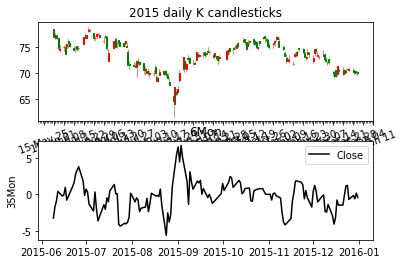

In [16]:
Foxconn15=Foxconn['2015']
candleLinePlots(Foxconn15,\
               candleTitle='2015 daily K candlesticks',\
               splitFigures=True,Data=momen6['2015'],\
               title='6Mon',ylabel='35Mon')

### 動能交易策略

In [17]:
signal=[1 if momen6Value>0 else -1 for momen6Value in momen6]
signal=pd.Series(signal,index=momen6.index)
signal.head()

tradeSig = signal.shift(1)
ret=Close/Close.shift(1)-1
Mom6Ret=(ret*(signal.shift(1))).dropna()
Mom6Ret[:5]

win=Mom6Ret[Mom6Ret>0]
winrate=len(win)/len(Mom6Ret)
winrate

0.45595854922279794

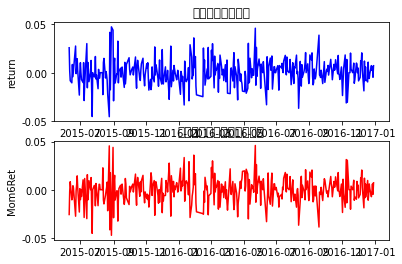

In [18]:
plt.subplot(2,1,1)
plt.plot(ret[Mom6Ret.index],'b')
plt.ylabel('return')
plt.title('鴻海收益率時序圖')

plt.subplot(2,1,2)
plt.plot(Mom6Ret,'r')
plt.ylabel('Mom6Ret')
plt.title('鴻海動量交易收益率時序圖')
plt.show()

In [19]:
loss=-Mom6Ret[Mom6Ret<0]

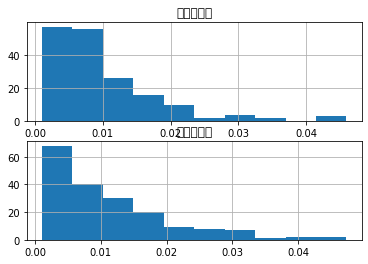

In [20]:
plt.subplot(2,1,1)
win.hist()
plt.title("盈利直方圖")
plt.subplot(2,1,2)
loss.hist()
plt.title("損失直方圖")
plt.show()

In [21]:
performance=pd.DataFrame({"win":win.describe(),\
"loss":loss.describe()})

performance

,win,loss
count,176.000000,187.000000
mean,0.010175,0.010890
std,0.008437,0.009372
min,0.001043,0.001040
25%,0.004028,0.003722
50%,0.008357,0.008206
75%,0.012956,0.015179
max,0.045957,0.047349


# (a、b) 30日動量值

In [22]:
lag30Close=Close.shift(30)

In [23]:
momentum30=Close-lag30Close
momentum30.tail()

Date
2016-12-26    4.3
2016-12-27    4.5
2016-12-28    5.0
2016-12-29    3.0
2016-12-30    3.3
Name: Close, dtype: float64

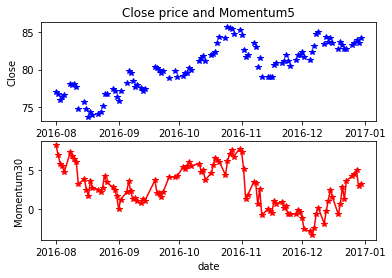

In [24]:
#plot
plt.subplot(211)
plt.plot(Close['2016-08-01':'2016-12-31'],'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Close price and Momentum5')
plt.subplot(212)
plt.plot(momentum30['2016-08-01':'2016-12-31'],'r-*')
plt.xlabel('date')
plt.ylabel('Momentum30')
plt.show()

In [25]:
#divide
Momen30=Close/lag30Close-1
Momen30=Momen30.dropna();
Momen30[:30]

Date
2015-07-15   -0.016494
2015-07-16   -0.018475
2015-07-17   -0.019541
2015-07-20    0.006419
2015-07-21    0.021171
2015-07-22   -0.001065
2015-07-23   -0.029013
2015-07-24   -0.053397
2015-07-27   -0.059491
2015-07-28   -0.052674
2015-07-29   -0.026616
2015-07-30   -0.041056
2015-07-31   -0.039218
2015-08-03   -0.057040
2015-08-04   -0.079173
2015-08-05   -0.083420
2015-08-06   -0.093216
2015-08-07   -0.106063
2015-08-10   -0.107771
2015-08-11   -0.086594
2015-08-12   -0.108260
2015-08-13   -0.108059
2015-08-14   -0.094907
2015-08-17   -0.093506
2015-08-18   -0.083060
2015-08-19   -0.094545
2015-08-20   -0.075020
2015-08-21   -0.084562
2015-08-24   -0.151714
2015-08-25   -0.102349
Name: Close, dtype: float64

In [26]:
#divide
Momen30=Close/lag30Close-1
Momen30=Momen30.dropna();
Momen30[:30]

Date
2015-07-15   -0.016494
2015-07-16   -0.018475
2015-07-17   -0.019541
2015-07-20    0.006419
2015-07-21    0.021171
2015-07-22   -0.001065
2015-07-23   -0.029013
2015-07-24   -0.053397
2015-07-27   -0.059491
2015-07-28   -0.052674
2015-07-29   -0.026616
2015-07-30   -0.041056
2015-07-31   -0.039218
2015-08-03   -0.057040
2015-08-04   -0.079173
2015-08-05   -0.083420
2015-08-06   -0.093216
2015-08-07   -0.106063
2015-08-10   -0.107771
2015-08-11   -0.086594
2015-08-12   -0.108260
2015-08-13   -0.108059
2015-08-14   -0.094907
2015-08-17   -0.093506
2015-08-18   -0.083060
2015-08-19   -0.094545
2015-08-20   -0.075020
2015-08-21   -0.084562
2015-08-24   -0.151714
2015-08-25   -0.102349
Name: Close, dtype: float64

In [27]:
momentum(Close,5).tail(n=5)

Date
2016-12-26    0.5
2016-12-27   -0.2
2016-12-28    0.7
2016-12-29    0.8
2016-12-30    1.5
Name: Close, dtype: float64

In [28]:
momen30=momentum(Close,30)

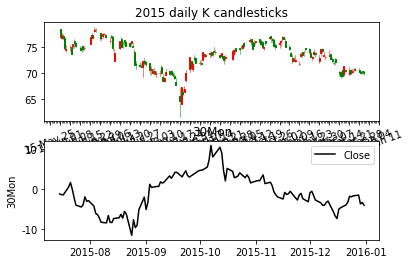

In [29]:
Foxconn15=Foxconn['2015']
candleLinePlots(Foxconn15,\
               candleTitle='2015 daily K candlesticks',\
               splitFigures=True,Data=momen30['2015'],\
               title='30Mon',ylabel='30Mon')

### 動能交易策略

In [30]:
signal=[1 if momen30Value>0 else -1 for momen30Value in momen30]
signal=pd.Series(signal,index=momen30.index)
signal.head()

tradeSig = signal.shift(1)
ret=Close/Close.shift(1)-1
Mom30Ret=(ret*(signal.shift(1))).dropna()
Mom30Ret[:5]

win=Mom30Ret[Mom30Ret>0]
winrate=len(win)/len(Mom30Ret)
winrate

0.511049723756906

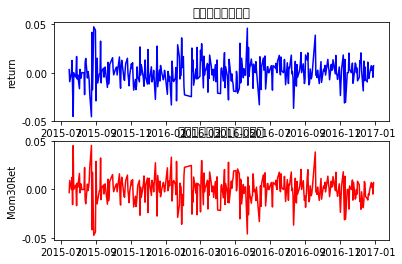

In [31]:
plt.subplot(2,1,1)
plt.plot(ret[Mom30Ret.index],'b')
plt.ylabel('return')
plt.title('鴻海收益率時序圖')

plt.subplot(2,1,2)
plt.plot(Mom30Ret,'r')
plt.ylabel('Mom30Ret')
plt.title('鴻海動量交易收益率時序圖')
plt.show()

In [32]:
loss=-Mom30Ret[Mom30Ret<0]

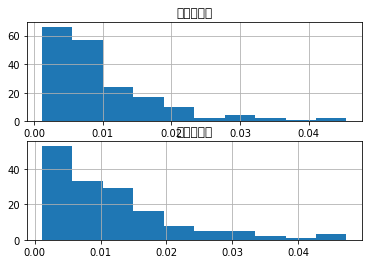

In [33]:
plt.subplot(2,1,1)
win.hist()
plt.title("盈利直方圖")
plt.subplot(2,1,2)
loss.hist()
plt.title("損失直方圖")
plt.show()

In [34]:
performance=pd.DataFrame({"win":win.describe(),\
"loss":loss.describe()})

performance

,win,loss
count,185.000000,155.000000
mean,0.009788,0.011266
std,0.008101,0.009754
min,0.001122,0.001111
25%,0.003828,0.003855
50%,0.007398,0.008610
75%,0.012953,0.015401
max,0.045522,0.047349


# (a、b) 90日動量值

In [35]:
lag90Close=Close.shift(90)

In [36]:
momentum90=Close-lag90Close
momentum90.tail()

Date
2016-12-26     8.53
2016-12-27     9.77
2016-12-28     9.66
2016-12-29     9.61
2016-12-30    10.12
Name: Close, dtype: float64

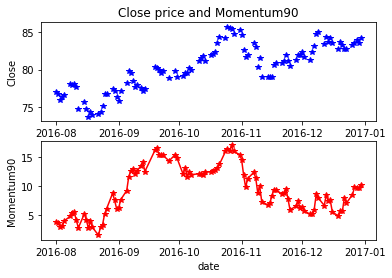

In [37]:
#plot
plt.subplot(211)
plt.plot(Close['2016-08-01':'2016-12-31'],'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Close price and Momentum90')
plt.subplot(212)
plt.plot(momentum90['2016-08-01':'2016-12-31'],'r-*')
plt.xlabel('date')
plt.ylabel('Momentum90')
plt.show()

In [38]:
#divide
Momen90=Close/lag90Close-1
Momen90=Momen90.dropna();
Momen90[:90]

Date
2015-10-12   -0.007532
2015-10-13   -0.019380
2015-10-14   -0.027097
2015-10-15    0.005616
2015-10-16    0.020501
                ...   
2016-02-17   -0.105058
2016-02-18   -0.096515
2016-02-19   -0.112223
2016-02-22   -0.117405
2016-02-23   -0.111835
Name: Close, Length: 90, dtype: float64

In [39]:
#divide
Momen90=Close/lag90Close-1
Momen90=Momen90.dropna();
Momen90[:90]

Date
2015-10-12   -0.007532
2015-10-13   -0.019380
2015-10-14   -0.027097
2015-10-15    0.005616
2015-10-16    0.020501
                ...   
2016-02-17   -0.105058
2016-02-18   -0.096515
2016-02-19   -0.112223
2016-02-22   -0.117405
2016-02-23   -0.111835
Name: Close, Length: 90, dtype: float64

In [40]:
momentum(Close,5).tail(n=5)

Date
2016-12-26    0.5
2016-12-27   -0.2
2016-12-28    0.7
2016-12-29    0.8
2016-12-30    1.5
Name: Close, dtype: float64

In [41]:
momen90=momentum(Close,90)

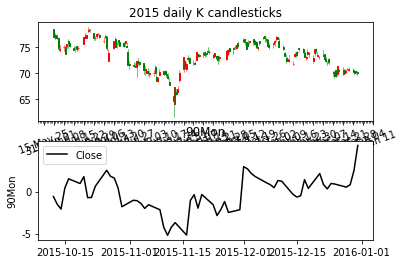

In [42]:
Foxconn15=Foxconn['2015']
candleLinePlots(Foxconn15,\
               candleTitle='2015 daily K candlesticks',\
               splitFigures=True,Data=momen90['2015'],\
               title='90Mon',ylabel='90Mon')

### 動能交易策略

In [43]:
signal=[1 if momen90Value>0 else -1 for momen90Value in momen90]
signal=pd.Series(signal,index=momen90.index)
signal.head()

tradeSig = signal.shift(1)
ret=Close/Close.shift(1)-1
Mom90Ret=(ret*(signal.shift(1))).dropna()
Mom90Ret[:5]

win=Mom90Ret[Mom90Ret>0]
winrate=len(win)/len(Mom90Ret)
winrate

0.5132450331125827

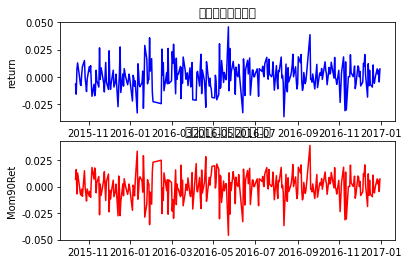

In [44]:
plt.subplot(2,1,1)
plt.plot(ret[Mom90Ret.index],'b')
plt.ylabel('return')
plt.title('鴻海收益率時序圖')

plt.subplot(2,1,2)
plt.plot(Mom90Ret,'r')
plt.ylabel('Mom90Ret')
plt.title('鴻海動量交易收益率時序圖')
plt.show()

In [45]:
loss=-Mom90Ret[Mom90Ret<0]

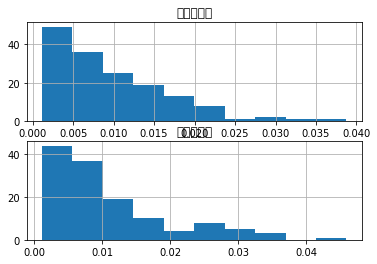

In [46]:
plt.subplot(2,1,1)
win.hist()
plt.title("盈利直方圖")
plt.subplot(2,1,2)
loss.hist()
plt.title("損失直方圖")
plt.show()

In [47]:
performance=pd.DataFrame({"win":win.describe(),\
"loss":loss.describe()})

performance

,win,loss
count,155.000000,131.000000
mean,0.009419,0.010826
std,0.006892,0.009139
min,0.001154,0.001140
25%,0.003770,0.003990
50%,0.007541,0.008254
75%,0.013217,0.013869
max,0.038760,0.045957
